# Linear Regression
Problem Definition - You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. I have performed the following analysis to figure it out.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

# Getting the Data
The Ecommerce Customers csv file from above mentioned company has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

Avg. Session Length: Average session of in-store style advice sessions.
Time on App: Average time spent on App in minutes
Time on Website: Average time spent on Website in minutes
Length of Membership: How many years the customer has been a member.

In [2]:
customers = pd.read_csv('Ecommerce Customers')

**Check the head of customers, and check out its info() and describe() methods.**

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [6]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

# Exploratory Data Analysis

Using seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns.

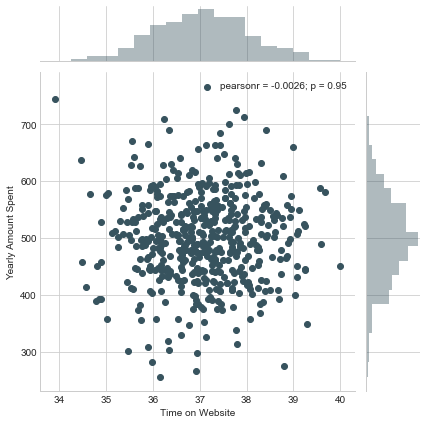

In [7]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(customers['Time on Website'], customers['Yearly Amount Spent'])

#observation - there does not appear to be a clear trend between Time on Website and Amount Spent by looking at below plot

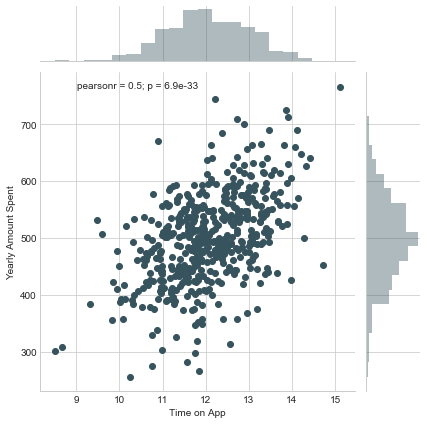

In [8]:
sns.jointplot(customers['Time on App'], customers['Yearly Amount Spent'])

#observation - there seems to be some correlation between Time on App and Amount Spent by looking at below plot

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

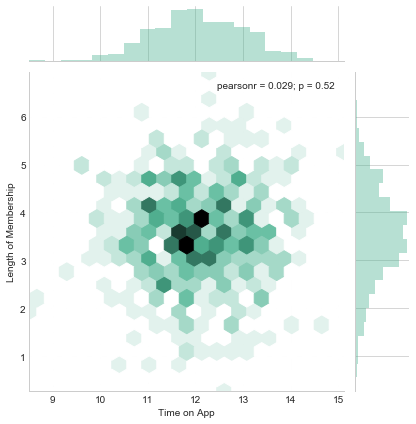

In [9]:
sns.jointplot(customers['Time on App'], customers['Length of Membership'], kind="hex", color="#4CB391")

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

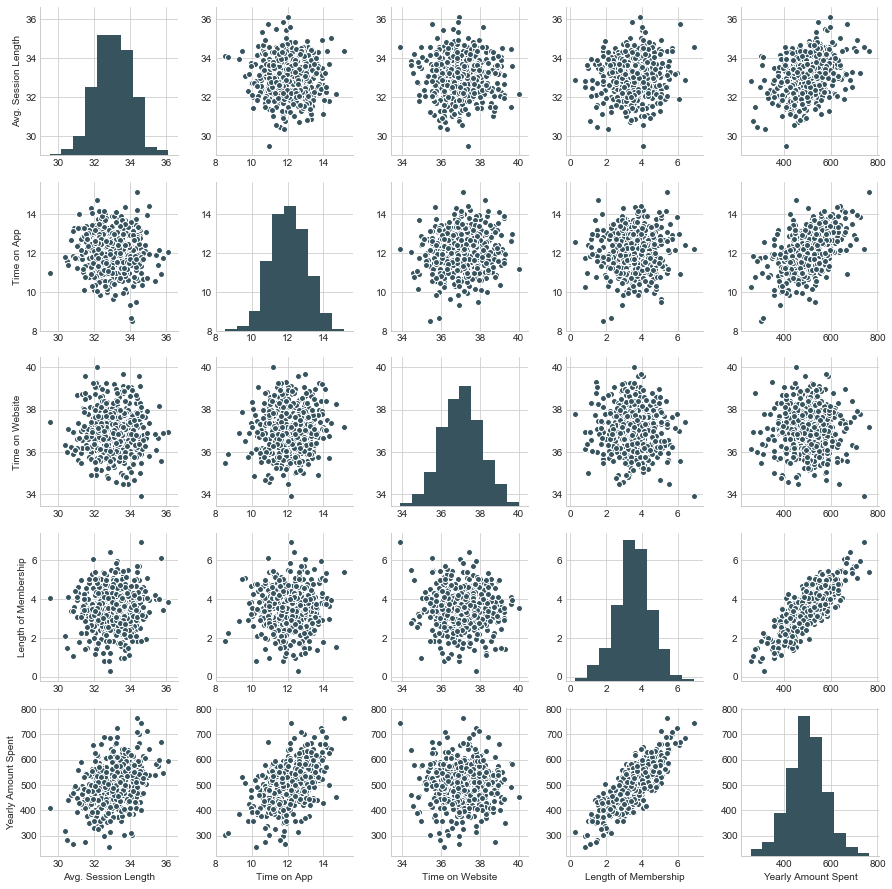

In [10]:
#observation - more or less all variables are normally distributed and highest correlation can be seen between the features - 
#Lenght of Membership and Yearly Amount Spent

sns.pairplot(customers)

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

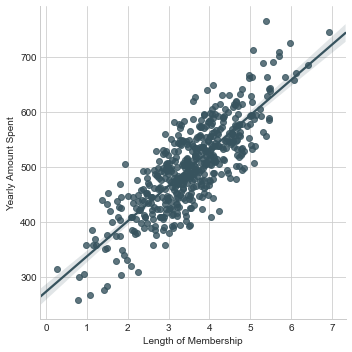

In [11]:
sns.lmplot (x ='Length of Membership', y ='Yearly Amount Spent', data= customers)

#observation - below plot seems to be a good linear fit with less error range. Hence we can say that longer people stay with the
#company, higher they will spend

## Training and Testing Data


In [12]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']] 
Y = customers['Yearly Amount Spent']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=101)

## Training the Model


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()

In [17]:
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
X_train.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

**Print out the coefficients of the model**

In [19]:
lm.coef_

array([ 25.98154972,  38.59015875,   0.19040528,  61.27909654])

## Predicting Test Data


In [20]:
predictions = lm.predict(X_test)

** Creating a scatterplot of the real test values versus the predicted values. **

Text(0,0.5,'Predicted Values')

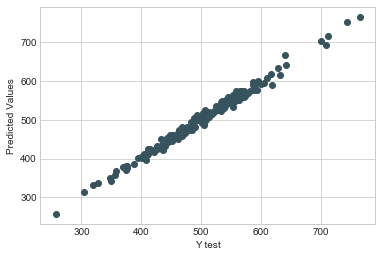

In [21]:
#observation - the almost perfect straight line in the below plot shows that the model has done a good job with the predictions
plt.scatter(Y_test, predictions)
plt.xlabel('Y test')
plt.ylabel('Predicted Values')

## Evaluating the Model

In [22]:
from sklearn import metrics

# Regression Evaluation Metrics


Three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world. Because if the errors are large, the sqaure term will magnify their effect and thus rendering the models as bad, given the large errors
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [23]:
print('MAE: ', metrics.mean_absolute_error(Y_test, predictions))
print('MSE: ', metrics.mean_squared_error(Y_test, predictions))
print('RME: ', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE:  7.22814865343
MSE:  79.813051651
RME:  8.93381506698


In [24]:
print('Explained variance score R^2: ',metrics.explained_variance_score(Y_test, predictions))

#interpretation - 99% of the variance is explained by this model

Explained variance score R^2:  0.989077123189


## Residuals


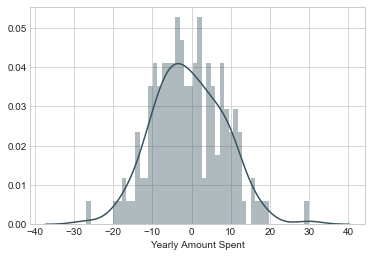

In [25]:
#observation - normal distribution of residuals is a good sign which means that chosen model was a correct choice for the data
sns.distplot((Y_test-predictions), bins = 50)

## Conclusion
 
The coefficients need to be interpreted to decide whether the focus efforst should be mobile app or website development or more importantly the Membership time.


In [26]:
pd.DataFrame(lm.coef_, X_train.columns, columns=["Coeffecients"])

,Coeffecients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


# Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of $25.981550

Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of $38.590159

Holding all other features fixed, a 1 unit increase in Time on Website	 is associated with an increase of $0.190405

Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of $61.279097

**Should the company focus more on their mobile app or on their website?**

Option 1 - App is doing better between the two as it has higher correlation with positively driving the amount spend. So, that can be developed further

Option 2 - Website is not performing well so capital should be invested there to bring it upto the mark where people start spending more through website

Answer - Business knowledge would help take decisions such as how much budget is granted for developing App vs. Website and what are the other factors influencing it because cost is associated with every feature varible and that needs to be taken into consideration. Relationship of time spent on App and website can be studied with Length of Membership to gain further insight of taking decision of whether to invest in App or website